In [1]:
cd ../

/Users/arbaaz/Downloads/mabe/mabe_code


In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import os
from data_utils import (
    get_index, 
    get_file_names,
    get_paths,
    get_col_names, 
    sleep
)


path = "/Users/arbaaz/Downloads/mabe/ds"
get_file_names(path)

['.DS_Store',
 'sample_submission.csv',
 'test.csv',
 'test_tracking',
 'train.csv',
 'train_annotation',
 'train_tracking']

In [4]:
get_file_names(path+"/train_annotation")

['AdaptableSnail',
 'BoisterousParrot',
 'CRIM13',
 'CalMS21_supplemental',
 'CalMS21_task1',
 'CalMS21_task2',
 'CautiousGiraffe',
 'DeliriousFly',
 'ElegantMink',
 'GroovyShrew',
 'InvincibleJellyfish',
 'JovialSwallow',
 'LyricalHare',
 'NiftyGoldfinch',
 'PleasantMeerkat',
 'ReflectiveManatee',
 'SparklingTapir',
 'TranquilPanther',
 'UppityFerret']

In [5]:
import pandas as pd


train_metadata = pd.read_csv("/Users/arbaaz/Downloads/mabe/ds/train.csv")
train_metadata.head()

,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,...,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,...,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,...,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,...,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


In [54]:
not_in_test = [
    "MABe22_keypoints",
    "MABe22_movies",
    "CalMS21_supplemental",
    "CalMS21_task1",
    "CalMS21_task2",
    "CRIM13"
]

In [205]:
train_meta = train_metadata.query("~lab_id.isin(@not_in_test)")
len(train_meta)

368

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in train_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")

Error in GroovyShrew


In [144]:
shrew = train_meta.groupby("lab_id").get_group("GroovyShrew")

all_ids_lsts = []

for col in id_cols:
    id_lst = shrew[col].unique().tolist()
    all_ids_lsts.append(id_lst)

all_ids_lsts

[[13.0, 18.0, 4.0, 15.0, 9.0, 19.0, 7.0],
 [16.0, 14.0, 8.0, 3.0, 6.0, 2.0, 1.0, 12.0, 4.0, 5.0],
 [nan],
 [nan]]

In [157]:
pretrain_labs = [
    "MABe22_keypoints",
    "MABe22_movies",
]

In [158]:
pretrain_meta = train_metadata.query("lab_id.isin(@pretrain_labs)")
pretrain_meta["lab_id"].unique()

array(['MABe22_keypoints', 'MABe22_movies'], dtype=object)

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in pretrain_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")

In [164]:
calcrim = [
    "CalMS21_supplemental",
    "CalMS21_task1",
    "CalMS21_task2",
    "CRIM13"
]

In [203]:
calcrim_meta = train_metadata.query("lab_id.isin(@calcrim)")
calcrim_meta["lab_id"].unique()

array(['CRIM13', 'CalMS21_supplemental', 'CalMS21_task1', 'CalMS21_task2'],
      dtype=object)

In [ ]:
# Checking if all ids of mouses are exlusive or not by lab

id_cols = get_col_names("_id")

for id, grp in calcrim_meta.groupby("lab_id"):
    all_ids_lsts = []
    
    for col in id_cols:
        id_lst = grp[col].unique().tolist()
        all_ids_lsts.append(id_lst)

    all_ids = [x for lst in all_ids_lsts for x in lst]
    
    if not len(set(all_ids)) == len(all_ids):
        print(f"Error in {id}")

In [223]:
from collections import defaultdict


all_ids_dict = defaultdict(set)

# check global ids of all mouses unique or not

for lab_id, grp in train_metadata.groupby("lab_id"):
    for col in id_cols:
        all_ids_dict[col].update(grp[col].unique())
        
all_ids = [x for v in all_ids_dict.values() for x in v]

len(set(all_ids)) == len(all_ids)

False

In [12]:
# how many mices per lab 

id_cols = get_col_names("_id")

for id, grp in train_metadata.groupby("lab_id"):
    print(id)
    print()
    
    for col in id_cols:
        print(f"{col}: {grp[col].unique().shape[0]}")
    
    print()

AdaptableSnail

mouse1_id: 10
mouse2_id: 10
mouse3_id: 10
mouse4_id: 8

BoisterousParrot

mouse1_id: 4
mouse2_id: 4
mouse3_id: 1
mouse4_id: 1

CRIM13

mouse1_id: 4
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

CalMS21_supplemental

mouse1_id: 79
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

CalMS21_task1

mouse1_id: 32
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

CalMS21_task2

mouse1_id: 46
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

CautiousGiraffe

mouse1_id: 7
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

DeliriousFly

mouse1_id: 1
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

ElegantMink

mouse1_id: 19
mouse2_id: 19
mouse3_id: 1
mouse4_id: 1

GroovyShrew

mouse1_id: 7
mouse2_id: 10
mouse3_id: 1
mouse4_id: 1

InvincibleJellyfish

mouse1_id: 33
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

JovialSwallow

mouse1_id: 9
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

LyricalHare

mouse1_id: 10
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

MABe22_keypoints

mouse1_id: 1
mouse2_id: 1
mouse3_id: 1
mouse4_id: 1

MABe22_movies

mouse1_id: 1
m

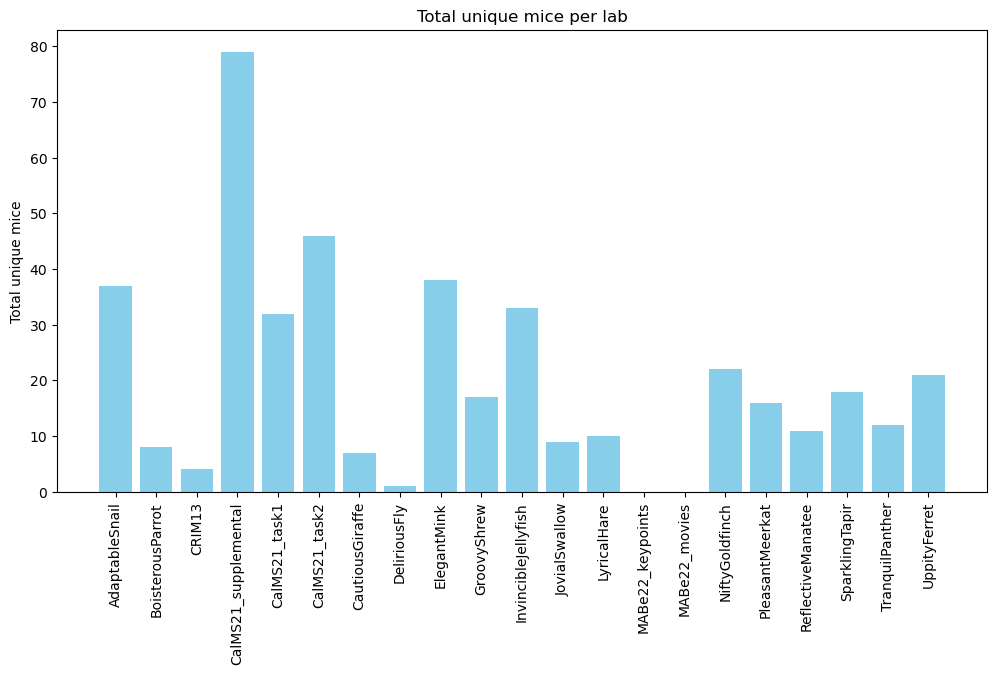

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Get all columns containing "_id"
id_cols = get_col_names("_id")

# Compute total unique mice per lab
lab_totals = train_metadata.groupby("lab_id")[id_cols].nunique().sum(axis=1)

# Convert to DataFrame for plotting
df_plot = lab_totals.reset_index()
df_plot.columns = ['lab_id', 'total_mice']

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(df_plot['lab_id'], df_plot['total_mice'], color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Total unique mice")
plt.title("Total unique mice per lab")
plt.show()


In [19]:
from data_utils import pretrain_labs


x = train_metadata.groupby("lab_id").get_group(pretrain_labs[0])

for l in pretrain_labs:
    x = train_metadata.groupby("lab_id").get_group(l)

    for col in id_cols:
        print(x[col].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [21]:
train_metadata.groupby("lab_id")[id_cols].nunique()

,mouse1_id,mouse2_id,mouse3_id,mouse4_id
lab_id,,,,
AdaptableSnail,10,10,10,7
BoisterousParrot,4,4,0,0
CRIM13,4,0,0,0
CalMS21_supplemental,79,0,0,0
CalMS21_task1,32,0,0,0
CalMS21_task2,46,0,0,0
CautiousGiraffe,7,0,0,0
DeliriousFly,1,0,0,0
ElegantMink,19,19,0,0
